## Numpy & Pandas


### Data Loading & Exploration

In [15]:
import torch
from scipy.io import loadmat
import torchvision.transforms as T
from PIL import Image

# Load MNIST data
mnist_data = loadmat('mnist-original.mat')
images = mnist_data['data'].T
labels = mnist_data['label'][0]

print(images[:10])
print(labels[:10])

# # Visualize a sample image
# transform = T.ToPILImage()
# img = transform(images[8000].view(28, 28))  # Reshape the image tensor to 2 dimensions (28x28)
# img.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Data Preprocessing

In [30]:
import numpy as np

#Flatten the 28x28 array to a 784 array
# print(images.shape)
x = images.reshape(images.shape[0], -1)

if np.isnan(images).any():
    images = np.nan_to_num(images)

# # Convert to PyTorch tensors
images = torch.from_numpy(images).float()
labels = torch.from_numpy(labels).long()

# # Normalize the pixel values to the range [0, 1]
images /= 255.0

# Matplotlib

### Data Visualization

[45984  2237  7502 43410 41670 68908 48055 12093 50921 66093]


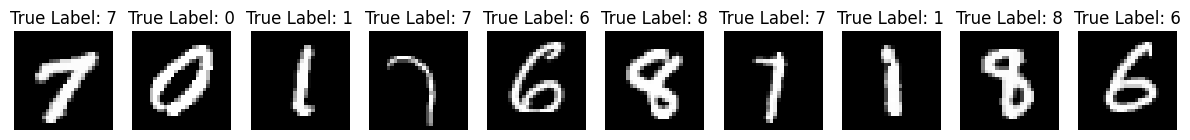

In [38]:
import matplotlib.pyplot as plt

# Function to display a random sample of images with their true labels
def display_images(images, labels, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    print(indices)
    
    # Plot the sample images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i, index in enumerate(indices):
        axes[i].imshow(images[index].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True Label: {labels[index].item()}')
        axes[i].axis('off')

    plt.show()

# Assuming 'images' and 'labels' are your processed data
display_images(images.numpy(), labels.numpy())


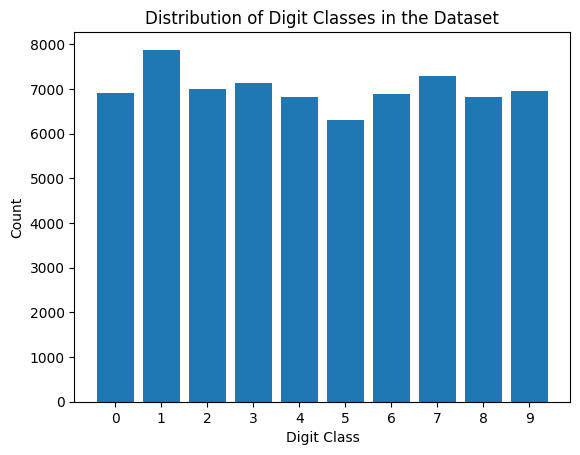

In [42]:
class_counts = np.bincount(labels)

plt.bar(np.arange(10), class_counts)

plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Distribution of Digit Classes in the Dataset')
plt.xticks(np.arange(10))
plt.show()


### Image Preprocessing


In [66]:
import torch
from torchvision import transforms
from torchvision.transforms import functional as F
from scipy.io import loadmat

mnist_data = loadmat('mnist-original.mat')
images = mnist_data['data'].T
labels = mnist_data['label'][0]

# Convert to PyTorch tensors
images = torch.from_numpy(images).float()
labels = torch.from_numpy(labels).long()

# Reshape the image tensor to 3 dimensions (batch size, height, width)
images = images.reshape(images.shape[0], 28, 28)

# Define image transformations for augmentation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
])

# Apply transformations to each image
augmented_images = torch.stack([transform(image) for image in images])



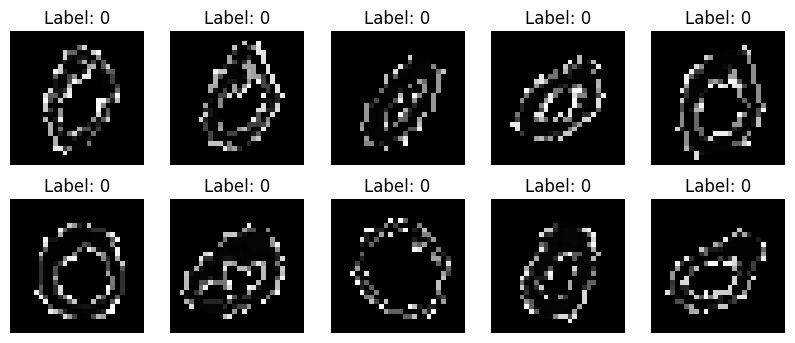

In [82]:
import random
random_indices = [el for el in range(100)]

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, idx in enumerate(random_indices):
    if i < 10:
        axs[i // 5, i % 5].imshow(augmented_images[idx].permute(1, 2, 0), cmap='gray')
        axs[i // 5, i % 5].axis('off')
        axs[i // 5, i % 5].set_title(f"Label: {labels[idx].item()}")

plt.show()
